In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm

In [4]:
ds = pd.read_csv("C:\\Users\\vizzi\\PROG_DSLAB_GITHUB\\Progetto_DSLAB\\DATASET SERIE STORICHE\\completissimo.csv")
# ds. = ['Data','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
ds.head()

,Unnamed: 0,PrezzoScandi,ConsumiScandi,GradiScandi,ConsumipercScandi,PrezzopercScandi,PrezzoPol,ConsumiPol,ConsumipercPol,PrezzopercPol,...,ConsumiITA,GradiITA,ConsumipercITA,PrezzopercITA,BankHolidayITA,EndYearITA,AugustBorderITA,AugustCenterITA,DayOfWeekITA,DayOffITA
0,1,29.46,33154.5,-9,0.000000,0.000000,148.06,13680,0.000000,0.000000,...,24659.16,-1,0.000000,0.000000,0,0,0,0,1,0
1,2,28.64,32427.6,-9,-2.192463,-2.783435,125.21,13115,-15.432933,-4.130117,...,23387.59,0,-5.156583,-8.501389,0,0,0,0,1,0
2,3,27.72,31971.2,-9,-1.407443,-3.212291,103.17,12438,-17.602428,-5.162028,...,22090.76,-1,-5.544949,-20.918569,0,0,0,0,1,0
3,4,27.79,31505.4,-9,-1.456936,0.252525,103.07,12022,-0.096927,-3.344589,...,21009.12,-1,-4.896346,0.000000,0,0,0,0,1,0
4,5,28.87,31433.4,-8,-0.228532,3.886290,102.97,11755,-0.097021,-2.220928,...,20350.99,-1,-3.132592,-1.518692,0,0,0,0,1,0


In [16]:
null_counts = ds.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [17]:
ds = pd.melt(ds, id_vars =['Data'], value_vars =['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'])
ds.columns = ['Data','Ora','Consumo']

In [18]:
from datetime import datetime, timedelta
ds["Data"] = [datetime(year=int(str(s)[0:4]), month=int(str(s)[4:6]), day=int(str(s)[6:8])) for s in ds["Data"]]
ds["Data"] = [d + timedelta(hours=int(o)) for d,o in zip(ds["Data"],ds["Ora"])]
ds = ds.sort_values(by=['Data']).reset_index()
del ds["Ora"]
del ds["index"]

ds.set_index('Data', inplace=True)
ds

,Consumo
Data,
2012-01-01 01:00:00,24659.160
2012-01-01 02:00:00,23387.590
2012-01-01 03:00:00,22090.760
2012-01-01 04:00:00,21009.120
2012-01-01 05:00:00,20350.990
...,...
2015-12-31 20:00:00,33426.851
2015-12-31 21:00:00,31423.924
2015-12-31 22:00:00,29315.420


In [20]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(ds["Consumo"])

Results of Dickey-Fuller Test:
Test Statistic                   -23.972527
p-value                            0.000000
#Lags Used                        52.000000
Number of Observations Used    35011.000000
Critical Value (1%)               -3.430537
Critical Value (5%)               -2.861623
Critical Value (10%)              -2.566814
dtype: float64


In [19]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(ds)

(0.01, False)

In [7]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


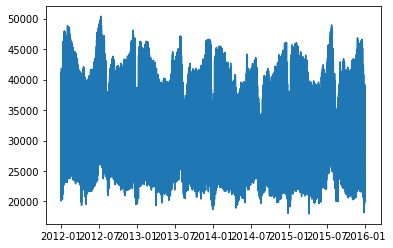

In [8]:
plt.plot(ds)

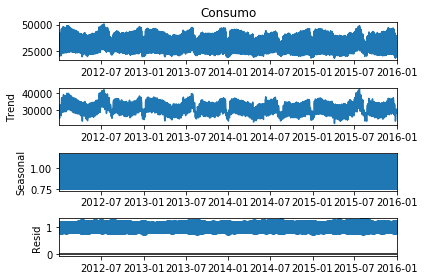

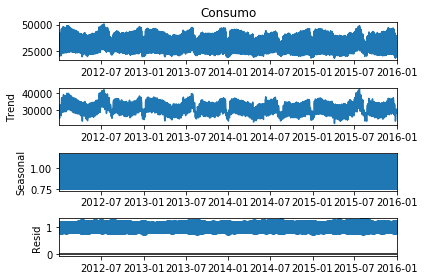

In [12]:
# ETS Decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(ds['Consumo'], model ='multiplicative') 
result.plot()

In [10]:
###https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(ds['Consumo'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 8760, 
                          start_P = 0, seasonal = False, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=601883.826, BIC=601917.686, Time=4.786 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=633651.867, BIC=633668.797, Time=0.777 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=604906.596, BIC=604931.991, Time=2.183 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=610167.032, BIC=610192.427, Time=7.495 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=633649.867, BIC=633658.332, Time=0.339 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=597906.628, BIC=597948.953, Time=20.317 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=601060.561, BIC=601094.420, Time=2.722 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=597137.320, BIC=597188.109, Time=41.399 seconds
Near non-invertible roots for order (3, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)
Fit ARIMA(2,1,2)x(0,0,0,0) [

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                35064
Model:               SARIMAX(3, 1, 3)   Log Likelihood             -298488.747
Date:                Mon, 06 Jul 2020   AIC                         596993.494
Time:                        08:10:51   BIC                         597061.214
Sample:                             0   HQIC                        597015.063
                              - 35064                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2750      0.446      0.617      0.537      -0.599       1.149
ar.L1          1.0625      0.063     16.883      0.000       0.939       1.186
ar.L2          0.2039      0.100      2.049      0.040       0.009       0.399
ar.L3         -0.4333      0.044     -9.908      0.000      -0.519      -0.348
ma.L1         -0.2083      0.064     -3.246      0.001      -0.334      -0.083
ma.L2         -0.6789      0.045    -15.250      0.000      -0.766      -0.592
ma.L3         -0.0527      0.019     -2.800      0.005      -0.090      -0.016
sigma2      1.448e+06      1e+04    144.486      0.000    1.43e+06    1.47e+06
===================================================================================
Ljung-Box (Q):                    27099.28   Jarque-Bera (JB):              2200.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""